<a href="https://colab.research.google.com/github/astitwa-agarwal12/Covid/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings 
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
warnings.filterwarnings('ignore')
dataset = 'drive/My Drive/dataset1'
imagePaths = list(paths.list_images(dataset))
data = []
labels = []
print(imagePaths)

['drive/My Drive/dataset1/Covid/bmj.m606.full-p4-22%3.png', 'drive/My Drive/dataset1/Covid/bmj.m606.full-p4-22%2.png', 'drive/My Drive/dataset1/Covid/PIIS0140673620303603%5.png', 'drive/My Drive/dataset1/Covid/2020.02.25.20021568-p23-108%15.png', 'drive/My Drive/dataset1/Covid/2020.03.10.20032136-p34-118_1%1.png', 'drive/My Drive/dataset1/Covid/2020.03.01.20029769-p21-73_2%2.png', 'drive/My Drive/dataset1/Covid/kjr-21-e24-p2-8.png', 'drive/My Drive/dataset1/Covid/2020.03.18.20038125-p15-54-5.png', 'drive/My Drive/dataset1/Covid/2020.03.22.20040782-p24-1533-5.png', 'drive/My Drive/dataset1/Covid/2020.03.18.20038125-p16-56-2.png', 'drive/My Drive/dataset1/Covid/2020.03.16.20036145-p19-128-2.png', 'drive/My Drive/dataset1/Covid/2020.03.19.20038539-p10-58.png', 'drive/My Drive/dataset1/Covid/2020.03.04.20031039-p23-97_1%2.png', 'drive/My Drive/dataset1/Covid/ehaa254-p0-63%2.png', 'drive/My Drive/dataset1/Covid/Comparison-of-different-samples-for-2019-novel-cor_2020_International-Journa-p2-

In [ ]:
for imagePath in imagePaths:
	
	label = imagePath.split(os.path.sep)[-2]
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	data.append(image)
	labels.append(label)

data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
data.shape

(746, 224, 224, 3)

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [ ]:
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

VGG 16 working

In [ ]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
for layer in baseModel.layers:
	layer.trainable = False


In [ ]:

model.compile(loss="binary_crossentropy", optimizer='Nadam',
	metrics=["accuracy"])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
BS = 16
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	
		epochs=50)

Epoch 1/50
37/37 [==============================] - 24s 323ms/step - loss: 0.7223 - accuracy: 0.5103 - val_loss: 0.6705 - val_accuracy: 0.6800
Epoch 2/50
37/37 [==============================] - 7s 193ms/step - loss: 0.6884 - accuracy: 0.5448 - val_loss: 0.6537 - val_accuracy: 0.6933
Epoch 3/50
37/37 [==============================] - 7s 193ms/step - loss: 0.6593 - accuracy: 0.6000 - val_loss: 0.6393 - val_accuracy: 0.6867
Epoch 4/50
37/37 [==============================] - 7s 194ms/step - loss: 0.6453 - accuracy: 0.6362 - val_loss: 0.6247 - val_accuracy: 0.7133
Epoch 5/50
37/37 [==============================] - 7s 193ms/step - loss: 0.6221 - accuracy: 0.6914 - val_loss: 0.6103 - val_accuracy: 0.7400
Epoch 6/50
37/37 [==============================] - 7s 194ms/step - loss: 0.6233 - accuracy: 0.6810 - val_loss: 0.5975 - val_accuracy: 0.7333
Epoch 7/50
37/37 [==============================] - 7s 194ms/step - loss: 0.5948 - accuracy: 0.6793 - val_loss: 0.5833 - val_accuracy: 0.7467
Epoch

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)

In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       0.79      0.84      0.81        70
   Non_Covid       0.85      0.80      0.83        80

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



In [ ]:
from sklearn.metrics import f1_score
f1_score(testY.argmax(axis=1), predIdxs, average='micro')

0.82

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(testY.argmax(axis=1), predIdxs)

0.8214285714285714

In [ ]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(testY.argmax(axis=1), predIdxs)
print('Sensitivity=',a[0,0]/(a[0,0]+a[0,1]))
print('Specificity=',a[1,1]/(a[1,0]+a[1,1]))

Sensitivity= 0.8428571428571429
Specificity= 0.8


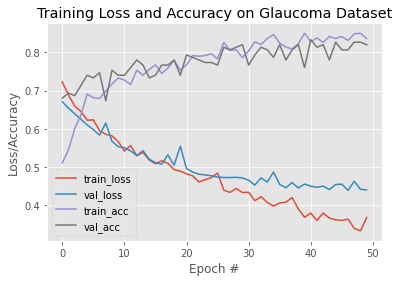

In [ ]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Glaucoma Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


RESNET101V2 working

In [ ]:
from tensorflow.keras.applications import ResNet101V2
resnet101_model = ResNet101V2(include_top = False, weights='imagenet', input_tensor = Input(shape=(224,224,3)))


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation
resnet101_head = resnet101_model.output
X = Flatten()(resnet101_head)
X = Dense(64)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
X = Dropout(0.25)(X)
X = Dense(64)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
X = Dropout(0.25)(X)
X = Dense(32)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
X = Dropout(0.25)(X)
X = Dense(32)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
resnet101_head = Dropout(0.5)(X)
resnet101_head = Dense(2, activation="softmax")(X)

In [ ]:
model = Model(inputs=resnet101_model.input, outputs=resnet101_head)
for layer in resnet101_model.layers:
	layer.trainable = False


In [ ]:
model.compile(loss="binary_crossentropy", optimizer='Nadam',
	metrics=["accuracy"])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
BS = 16
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=50)

Epoch 1/50
37/37 [==============================] - 16s 245ms/step - loss: 0.6358 - accuracy: 0.6603 - val_loss: 0.5554 - val_accuracy: 0.6933
Epoch 2/50
37/37 [==============================] - 9s 240ms/step - loss: 0.4442 - accuracy: 0.8328 - val_loss: 0.7876 - val_accuracy: 0.6200
Epoch 3/50
37/37 [==============================] - 7s 200ms/step - loss: 0.3656 - accuracy: 0.8672 - val_loss: 0.5943 - val_accuracy: 0.7267
Epoch 4/50
37/37 [==============================] - 7s 200ms/step - loss: 0.2588 - accuracy: 0.8966 - val_loss: 0.6000 - val_accuracy: 0.7800
Epoch 5/50
37/37 [==============================] - 8s 202ms/step - loss: 0.2667 - accuracy: 0.8931 - val_loss: 0.4533 - val_accuracy: 0.8267
Epoch 6/50
37/37 [==============================] - 8s 203ms/step - loss: 0.2122 - accuracy: 0.9207 - val_loss: 0.4463 - val_accuracy: 0.8333
Epoch 7/50
37/37 [==============================] - 8s 203ms/step - loss: 0.1710 - accuracy: 0.9259 - val_loss: 0.5353 - val_accuracy: 0.8067
Epoch

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       0.84      0.83      0.83        70
   Non_Covid       0.85      0.86      0.86        80

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [ ]:
from sklearn.metrics import f1_score
f1_score(testY.argmax(axis=1), predIdxs, average='micro')

0.8466666666666667

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(testY.argmax(axis=1), predIdxs)

0.8455357142857143

In [ ]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(testY.argmax(axis=1), predIdxs)
print('Sensitivity=',a[0,0]/(a[0,0]+a[0,1]))
print('Specificity=',a[1,1]/(a[1,0]+a[1,1]))

Sensitivity= 0.8285714285714286
Specificity= 0.8625


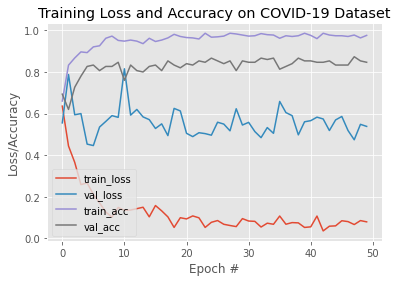

In [ ]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


Xception working

In [ ]:
from tensorflow.keras.applications import Xception
base_model = Xception(include_top = False, weights='imagenet', input_tensor = Input(shape=(224,224,3)))

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(200,activation='elu')(x)
x = Dropout(0.4)(x)
x = Dense(170,activation='elu')(x)
predictions = Dense(2,activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Nadam(lr=0.001), 
loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=50)

Epoch 1/50
37/37 [==============================] - 27s 391ms/step - loss: 0.5947 - accuracy: 0.7034 - val_loss: 1.0503 - val_accuracy: 0.6467
Epoch 2/50
37/37 [==============================] - 13s 361ms/step - loss: 0.4304 - accuracy: 0.8259 - val_loss: 0.7177 - val_accuracy: 0.7000
Epoch 3/50
37/37 [==============================] - 13s 352ms/step - loss: 0.3833 - accuracy: 0.8414 - val_loss: 0.8707 - val_accuracy: 0.6733
Epoch 4/50
37/37 [==============================] - 13s 359ms/step - loss: 0.4060 - accuracy: 0.8397 - val_loss: 2.5562 - val_accuracy: 0.5933
Epoch 5/50
37/37 [==============================] - 13s 347ms/step - loss: 0.3322 - accuracy: 0.8586 - val_loss: 1.5996 - val_accuracy: 0.7533
Epoch 6/50
37/37 [==============================] - 14s 359ms/step - loss: 0.2288 - accuracy: 0.9034 - val_loss: 1.1961 - val_accuracy: 0.7667
Epoch 7/50
37/37 [==============================] - 13s 359ms/step - loss: 0.2294 - accuracy: 0.9190 - val_loss: 0.5042 - val_accuracy: 0.8467

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       0.87      0.86      0.86        70
   Non_Covid       0.88      0.89      0.88        80

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



In [ ]:
from sklearn.metrics import f1_score
f1_score(testY.argmax(axis=1), predIdxs, average='micro')

0.8733333333333333

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(testY.argmax(axis=1), predIdxs)

0.8723214285714286

In [ ]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(testY.argmax(axis=1), predIdxs)
print('Sensitivity=',a[0,0]/(a[0,0]+a[0,1]))
print('Specificity=',a[1,1]/(a[1,0]+a[1,1]))

Sensitivity= 0.8571428571428571
Specificity= 0.8875


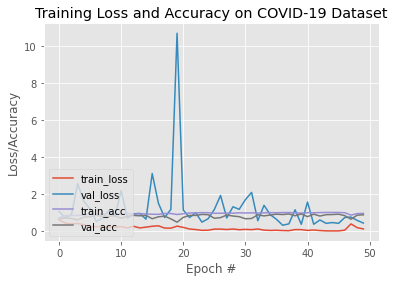

In [ ]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

InceptionV3 working

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
baseModel = InceptionV3(include_top=False, weights='imagenet', input_shape=(224,224,3))

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
headModel = Flatten()(baseModel.output)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [ ]:
for layer in baseModel.layers:
  layer.trainable = False

In [ ]:
model = Model(baseModel.input, headModel)

In [ ]:
model.compile(optimizer=Nadam(lr=0.001), 
loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_16 (BatchN  (None, 111, 111, 32  96         ['conv2d_8[0][0]']               
 ormalization)                  )                                                           

In [ ]:
BS = 16
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=50)

Epoch 1/50
37/37 [==============================] - 15s 290ms/step - loss: 10.4796 - accuracy: 0.5948 - val_loss: 2.0955 - val_accuracy: 0.6267
Epoch 2/50
37/37 [==============================] - 8s 220ms/step - loss: 1.4988 - accuracy: 0.6810 - val_loss: 0.5340 - val_accuracy: 0.7467
Epoch 3/50
37/37 [==============================] - 7s 185ms/step - loss: 0.6099 - accuracy: 0.7552 - val_loss: 0.5061 - val_accuracy: 0.7400
Epoch 4/50
37/37 [==============================] - 7s 191ms/step - loss: 0.4938 - accuracy: 0.7897 - val_loss: 0.4472 - val_accuracy: 0.8000
Epoch 5/50
37/37 [==============================] - 7s 191ms/step - loss: 0.4285 - accuracy: 0.7879 - val_loss: 0.4897 - val_accuracy: 0.7533
Epoch 6/50
37/37 [==============================] - 7s 186ms/step - loss: 0.5639 - accuracy: 0.8328 - val_loss: 0.4637 - val_accuracy: 0.7867
Epoch 7/50
37/37 [==============================] - 8s 224ms/step - loss: 0.3896 - accuracy: 0.8310 - val_loss: 0.5803 - val_accuracy: 0.7467
Epoc

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)

In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)


In [ ]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       0.82      0.86      0.84        70
   Non_Covid       0.87      0.84      0.85        80

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [ ]:
from sklearn.metrics import f1_score
f1_score(testY.argmax(axis=1), predIdxs, average='micro')

0.8466666666666667

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(testY.argmax(axis=1), predIdxs)

0.8473214285714286

In [ ]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(testY.argmax(axis=1), predIdxs)
print('Sensitivity=',a[0,0]/(a[0,0]+a[0,1]))
print('Specificity=',a[1,1]/(a[1,0]+a[1,1]))

Sensitivity= 0.8571428571428571
Specificity= 0.8375


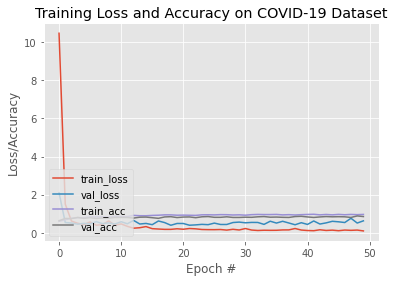

In [ ]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

InceptionResNetV2 working

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

In [ ]:
baseModel = InceptionResNetV2(include_top=False, weights='imagenet', input_shape= (224,224,3))

219070464/219055592 [==============================] - 3s 0us/step


In [ ]:
X = baseModel.output
X = Flatten()(X)
X = Dense(64)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
X = Dropout(0.25)(X)
X = Dense(64)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
X = Dropout(0.25)(X)
X = Dense(32)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
X = Dropout(0.25)(X)
X = Dense(32)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
X = Dropout(0.5)(X)
X = Dense(2, activation="softmax")(X)

In [ ]:
for layer in baseModel.layers:
  layer.trainable = False

In [ ]:
model = Model(baseModel.input, X)

In [ ]:
model.compile(optimizer=Nadam(lr=0.001), 
loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_102 (Conv2D)            (None, 111, 111, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_110 (Batch  (None, 111, 111, 32  96         ['conv2d_102[0][0]']             
 Normalization)                 )                                                           

In [ ]:
H1 = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=50)

Epoch 1/50
37/37 [==============================] - 24s 346ms/step - loss: 0.6894 - accuracy: 0.6655 - val_loss: 0.6400 - val_accuracy: 0.6333
Epoch 2/50
37/37 [==============================] - 8s 216ms/step - loss: 0.6283 - accuracy: 0.7172 - val_loss: 0.5328 - val_accuracy: 0.7400
Epoch 3/50
37/37 [==============================] - 8s 218ms/step - loss: 0.5357 - accuracy: 0.7759 - val_loss: 0.4680 - val_accuracy: 0.8000
Epoch 4/50
37/37 [==============================] - 8s 217ms/step - loss: 0.4354 - accuracy: 0.8155 - val_loss: 0.5090 - val_accuracy: 0.7533
Epoch 5/50
37/37 [==============================] - 8s 219ms/step - loss: 0.3829 - accuracy: 0.8466 - val_loss: 0.4087 - val_accuracy: 0.8600
Epoch 6/50
37/37 [==============================] - 8s 218ms/step - loss: 0.3237 - accuracy: 0.8810 - val_loss: 0.4567 - val_accuracy: 0.8200
Epoch 7/50
37/37 [==============================] - 9s 256ms/step - loss: 0.2714 - accuracy: 0.9069 - val_loss: 0.4196 - val_accuracy: 0.8533
Epoch

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)

In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)


In [ ]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       0.85      0.87      0.86        70
   Non_Covid       0.88      0.86      0.87        80

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



In [ ]:
from sklearn.metrics import f1_score
f1_score(testY.argmax(axis=1), predIdxs, average='micro')

0.8666666666666667

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(testY.argmax(axis=1), predIdxs)

0.8669642857142857

In [ ]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(testY.argmax(axis=1), predIdxs)
print('Sensitivity=',a[0,0]/(a[0,0]+a[0,1]))
print('Specificity=',a[1,1]/(a[1,0]+a[1,1]))

Sensitivity= 0.8714285714285714
Specificity= 0.8625


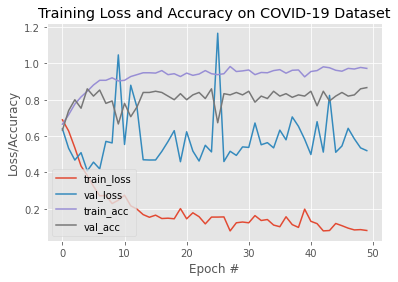

In [ ]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")